GROUP NUMBER: 03</br>
GROUP MEMBER:</br> 
SACHIN</br>
TAVLEEN</br>
THOMPSON</br>

# Plant Disease Detection Leveraging Machine Learning for Small Businesses

![](https://debuggercafe.com/wp-content/uploads/2022/09/sample-images-plant-disease-recognition-dataset.png)

### Importance of Plant Disease Detection
1. Food Security: Ensures a steady supply of healthy crops.
2. Economic Impact: Reduces losses due to crop failure.
3. Sustainability: Promotes sustainable farming practices by early detection and treatment.

### About the Dataset
This dataset includes a total of 1530 plant images, which are labeled based on their condition as 'Healthy,' 'Powdery,' or 'Rust.' The images are separated into three distinct groups for machine learning purposes: one for training the model, one for testing the model, and one for validating the model's performance.

###  Required Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from PIL import Image
from keras.utils import plot_model
from zipfile import ZipFile, BadZipFile
import random as r
import warnings
import matplotlib.patches as patches
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### Loading the Dataset

In [3]:
# Define path

train_path = 'C:/Users/HP/Downloads/SPRINT 3/DATASET/Train/Train'
test_path = 'C:/Users/HP/Downloads/SPRINT 3/DATASET/Test/Test'
validation_path = 'C:/Users/HP/Downloads/SPRINT 3/DATASET/Validation/Validation'

In [4]:
os.listdir(validation_path)

['Healthy', 'Powdery', 'Rust']

### Exploratory Data Analysis (EDA)

In [5]:
def count_files_in_folder(path):
  folder_data = []
  for fol in os.listdir(path):
    folder_path = os.path.join(path, fol)
    fil = os.listdir(folder_path)
    num_files = 0
    for item in fil:
      if os.path.isfile(os.path.join(folder_path, item)):
        num_files +=1

    folder_data.append([fol, num_files])


  return folder_data

In [6]:
train_data = count_files_in_folder(train_path)
test_data = count_files_in_folder(test_path)
validation_data = count_files_in_folder(validation_path)

In [7]:
train_df = pd.DataFrame(train_data, columns =['Folder', 'Total Files'])
test_df = pd.DataFrame(test_data, columns =['Folder', 'Total Files'])
validation_df = pd.DataFrame(validation_data, columns =['Folder', 'Total Files'])

In [8]:
train_df['Type'] = 'Train'
test_df['Type'] = 'Test'
validation_df['Type'] = 'Validation'

In [9]:
combined_df = pd.concat([train_df, test_df, validation_df])

In [10]:
combined_df

Folder  Total Files        Type
0  Healthy          458       Train
1  Powdery          430       Train
2     Rust          434       Train
0  Healthy           50        Test
1  Powdery           50        Test
2     Rust           50        Test
0  Healthy           20  Validation
1  Powdery           20  Validation
2     Rust           20  Validation

<Axes: xlabel='Folder', ylabel='Total Files'>

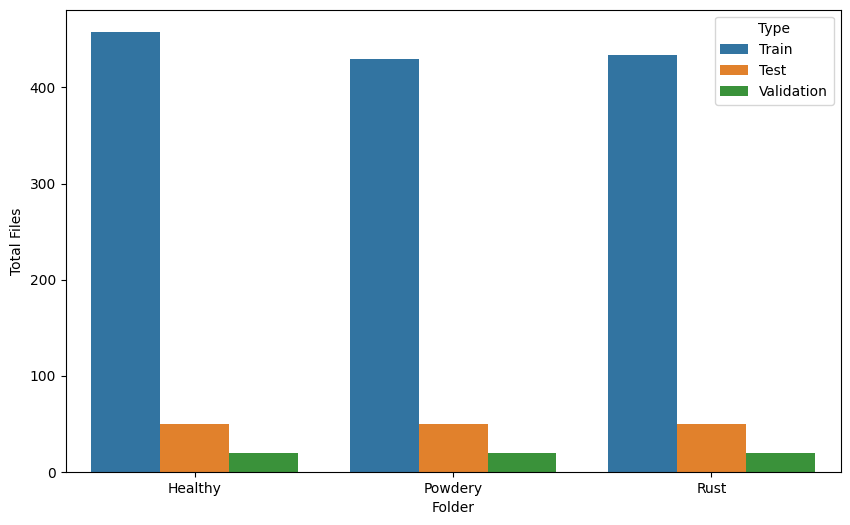

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Folder', y ='Total Files', hue ='Type', data =combined_df)

In [12]:
def plot_sample_img(path_folder, sample_size = 5):
  images =[]
  all_file = [f for f in os.listdir(path_folder) if os.path.isfile(os.path.join(path_folder, f))]
  sample_file = r.sample(all_file, sample_size)

  for img in sample_file:
    path = os.path.join(path_folder, img)
    image = Image.open(path)
    images.append(image)

  return images

In [13]:
train_healthy = 'C:/Users/HP/Downloads/SPRINT 3/DATASET/Train/Train/Healthy'
train_Powdery = 'C:/Users/HP/Downloads/SPRINT 3/DATASET/Train/Train/Powdery'
train_Rust = 'C:/Users/HP/Downloads/SPRINT 3/DATASET/Train/Train/Rust'

In [14]:
healthy_img = plot_sample_img(train_healthy)
powdery_img = plot_sample_img(train_Powdery)
rust_img = plot_sample_img(train_Rust)

In [15]:
all_img = [healthy_img, powdery_img,  rust_img]

Plants Image Visualization

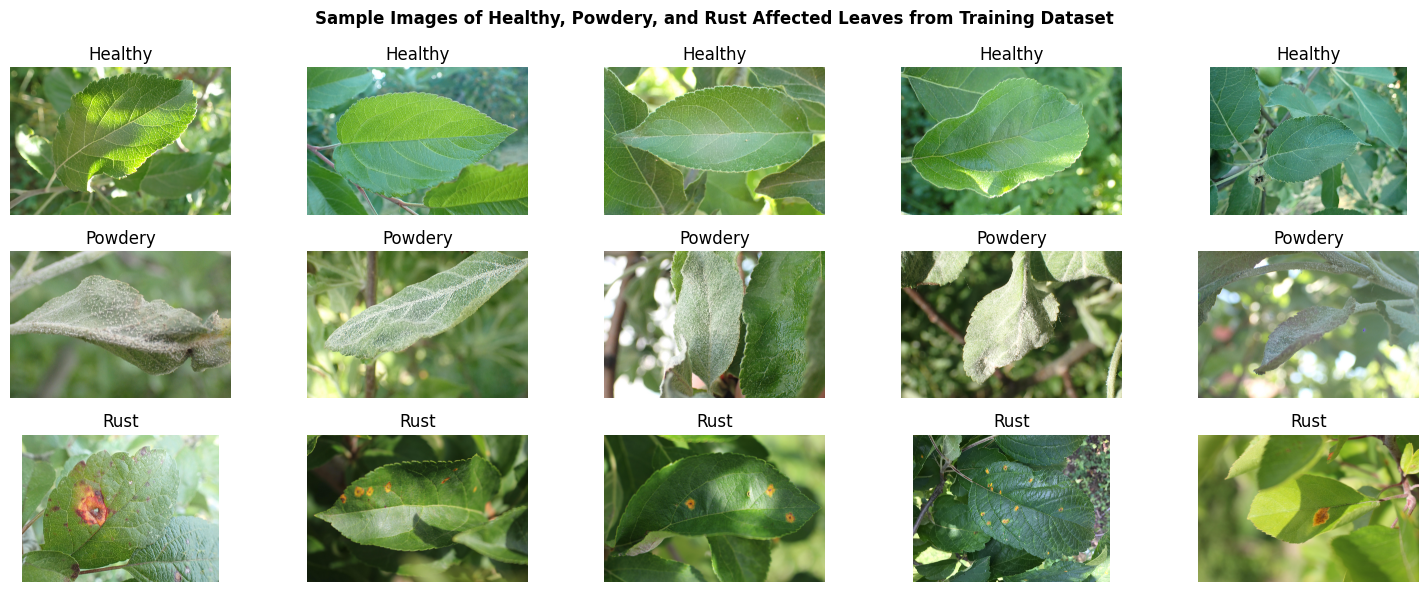

In [16]:
fig, axes = plt.subplots(3, len(healthy_img), figsize=(15,6))
title = ['Healthy', 'Powdery', 'Rust']
for row, category in enumerate(all_img):
  for i, img in enumerate(category):
    axes[row, i].imshow(img)
    axes[row, i].set_title(title[row])
    axes[row, i].axis('off')

plt.suptitle('Sample Images of Healthy, Powdery, and Rust Affected Leaves from Training Dataset', fontweight='bold')
plt.tight_layout()
plt.show()

### Data Augmentation

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen =  ImageDataGenerator(rescale = 1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_path,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_path,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode = 'categorical')

Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [19]:
train_generator.class_indices

{'Healthy': 0, 'Powdery': 1, 'Rust': 2}

### First Model CNN

Model Training

In [20]:
model = Sequential()

model.add(Conv2D(56, kernel_size = (3,3), activation = 'relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(28, kernel_size = (3,3), activation = 'relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((3,3)))

model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
16
model.add(Dense(32, activation = 'relu'))
model.add(Dense(14, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation = 'softmax'))

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
42/42 [==============================] - 117s 3s/step - loss: 1.1025 - accuracy: 0.3495 - val_loss: 1.0795 - val_accuracy: 0.3667
Epoch 2/10
42/42 [==============================] - 112s 3s/step - loss: 1.0782 - accuracy: 0.3722 - val_loss: 1.0513 - val_accuracy: 0.4000
Epoch 3/10
42/42 [==============================] - 110s 3s/step - loss: 0.9972 - accuracy: 0.4705 - val_loss: 0.8137 - val_accuracy: 0.6000
Epoch 4/10
42/42 [==============================] - 110s 3s/step - loss: 0.8300 - accuracy: 0.5998 - val_loss: 0.6688 - val_accuracy: 0.6833
Epoch 5/10
42/42 [==============================] - 109s 3s/step - loss: 0.6791 - accuracy: 0.6959 - val_loss: 0.5313 - val_accuracy: 0.7000
Epoch 6/10
42/42 [==============================] - 113s 3s/step - loss: 0.5182 - accuracy: 0.8086 - val_loss: 0.4216 - val_accuracy: 0.7667
Epoch 7/10
42/42 [==============================] - 113s 3s/step - loss: 0.3566 - accuracy: 0.8782 - val_loss: 0.3238 - val_accuracy: 0.8667
Epoch 8/10
42

Plotting loss and Accuracy

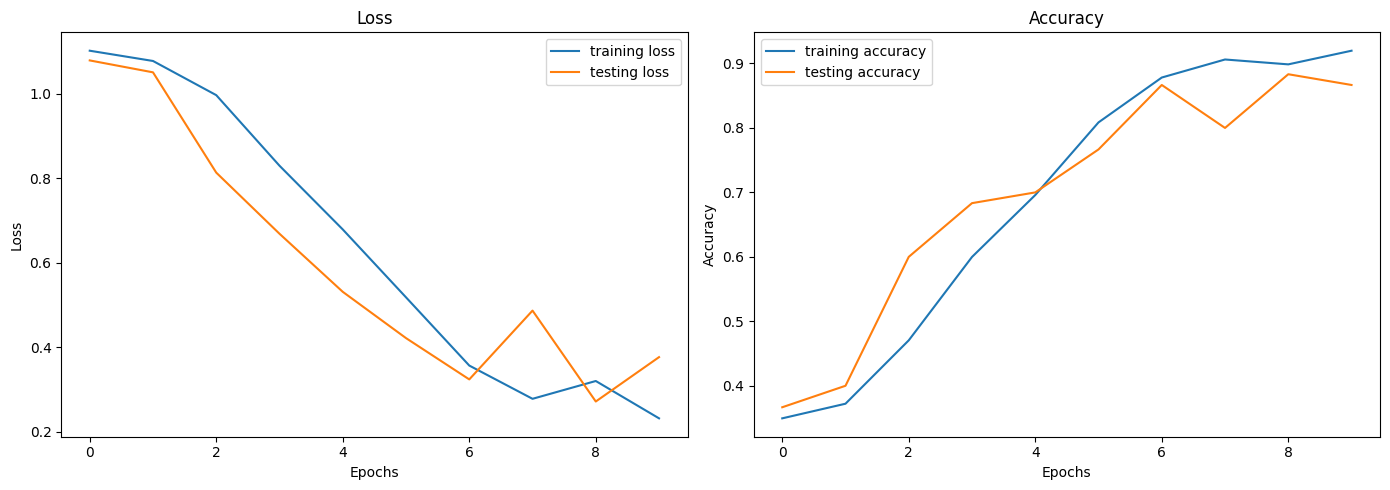

In [23]:
fig, axes = plt.subplots(1,2 , figsize =(14, 5))

sns.lineplot(ax = axes[0], data = history.history['loss'], label = 'training loss' )
sns.lineplot(ax= axes[0], data = history.history['val_loss'], label = 'testing loss')
axes[0].set_title('Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

sns.lineplot(ax = axes[1], data = history.history['accuracy'], label = 'training accuracy')
sns.lineplot(ax = axes[1], data = history.history['val_accuracy'], label = 'testing accuracy')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

Model Evaluation

In [24]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Testing Loss: {test_loss}")
print(f"Testing Accuracy: {test_accuracy}")

5/5 [==============================] - 7s 1s/step - loss: 0.3286 - accuracy: 0.8600
Testing Loss: 0.3286112844944
Testing Accuracy: 0.8600000143051147


Model Prediction

In [25]:
def process_image(img, target_size=(224, 224)):
    # If img is a path, load the image
    if isinstance(img, str):
        img = image.load_img(img, target_size=target_size)
    else:
        # If img is a PIL image, resize it
        img = img.resize(target_size)
    
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

In [26]:
test_healthy = 'C:/Users/HP/Downloads/SPRINT 3/DATASET/Test/Test/Healthy'
test_Powdery = 'C:/Users/HP/Downloads/SPRINT 3/DATASET/Test/Test/Powdery'
test_Rust = 'C:/Users/HP/Downloads/SPRINT 3/DATASET/Test/Test/Rust'

In [27]:
img_healthy = plot_sample_img(test_healthy)
img_Powdery = plot_sample_img(test_Powdery)
img_Rust = plot_sample_img(test_Rust)

In [28]:
train_generator.class_indices

{'Healthy': 0, 'Powdery': 1, 'Rust': 2}

1/1 [==============================] - 0s 17ms/step


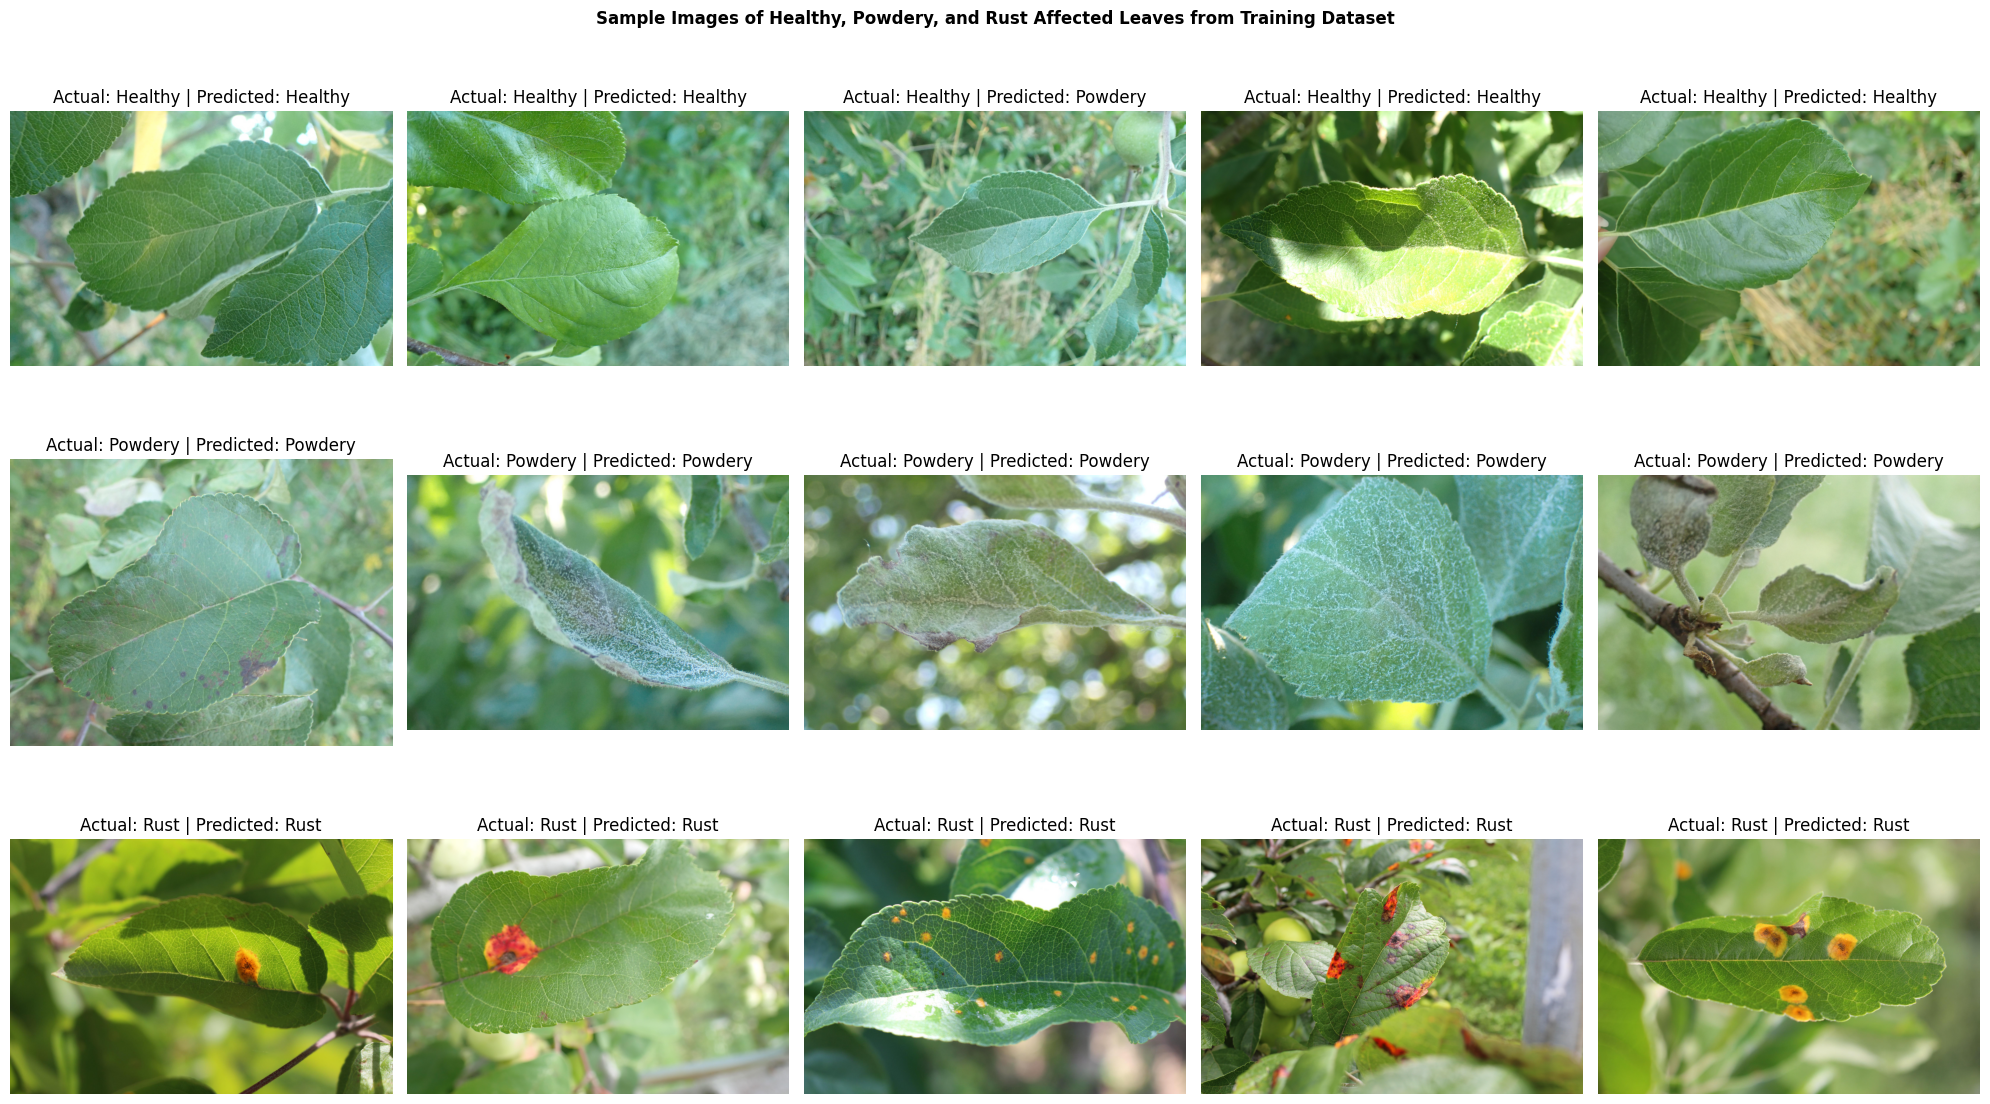

In [29]:
test_img = [img_healthy, img_Powdery, img_Rust]
fig, axes = plt.subplots(3, len(healthy_img), figsize=(20,12))
title = ['Actual: Healthy', 'Actual: Powdery', 'Actual: Rust']
for row, category in enumerate(test_img):
  for i, img in enumerate(category):
    processed_img = process_image(img)
    pred = model.predict(processed_img)
    ind = np.argmax(pred)
    
    if ind == 0:
        pred_title = ' | Predicted: Healthy'
    elif ind == 1:
        pred_title = ' | Predicted: Powdery'
    else: 
        pred_title = ' | Predicted: Rust'
    axes[row, i].imshow(img)
    axes[row, i].set_title(title[row] + pred_title)
    axes[row, i].axis('off')

plt.suptitle('Sample Images of Healthy, Powdery, and Rust Affected Leaves from Training Dataset', fontweight='bold')
plt.tight_layout()
plt.show()

### Second Model VGG16

Model Training 

In [30]:
# Load the VGG16 model, pre-trained on ImageNet, without the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
model_vgg16 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_vgg16 = model_vgg16.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
42/42 [==============================] - 211s 5s/step - loss: 1.0799 - accuracy: 0.4024 - val_loss: 0.9404 - val_accuracy: 0.6333
Epoch 2/10
42/42 [==============================] - 210s 5s/step - loss: 0.9694 - accuracy: 0.5340 - val_loss: 0.8256 - val_accuracy: 0.8167
Epoch 3/10
42/42 [==============================] - 210s 5s/step - loss: 0.8869 - accuracy: 0.6180 - val_loss: 0.7434 - val_accuracy: 0.8333
Epoch 4/10
42/42 [==============================] - 211s 5s/step - loss: 0.8279 - accuracy: 0.6566 - val_loss: 0.6735 - val_accuracy: 0.9000
Epoch 5/10
42/42 [==============================] - 212s 5s/step - loss: 0.7670 - accuracy: 0.6899 - val_loss: 0.6296 - val_accuracy: 0.7833
Epoch 6/10
42/42 [==============================] - 209s 5s/step - loss: 0.7259 - accuracy: 0.7035 - val_loss: 0.5853 - val_accuracy: 0.7833
Epoch 7/10
42/42 [==============================] - 212s 5s/step - loss: 0.6746 - accuracy: 0.7352 - val_loss: 0.5432 - val_accuracy: 0.8833
Epoch 8/10
42

### Compare both the Models

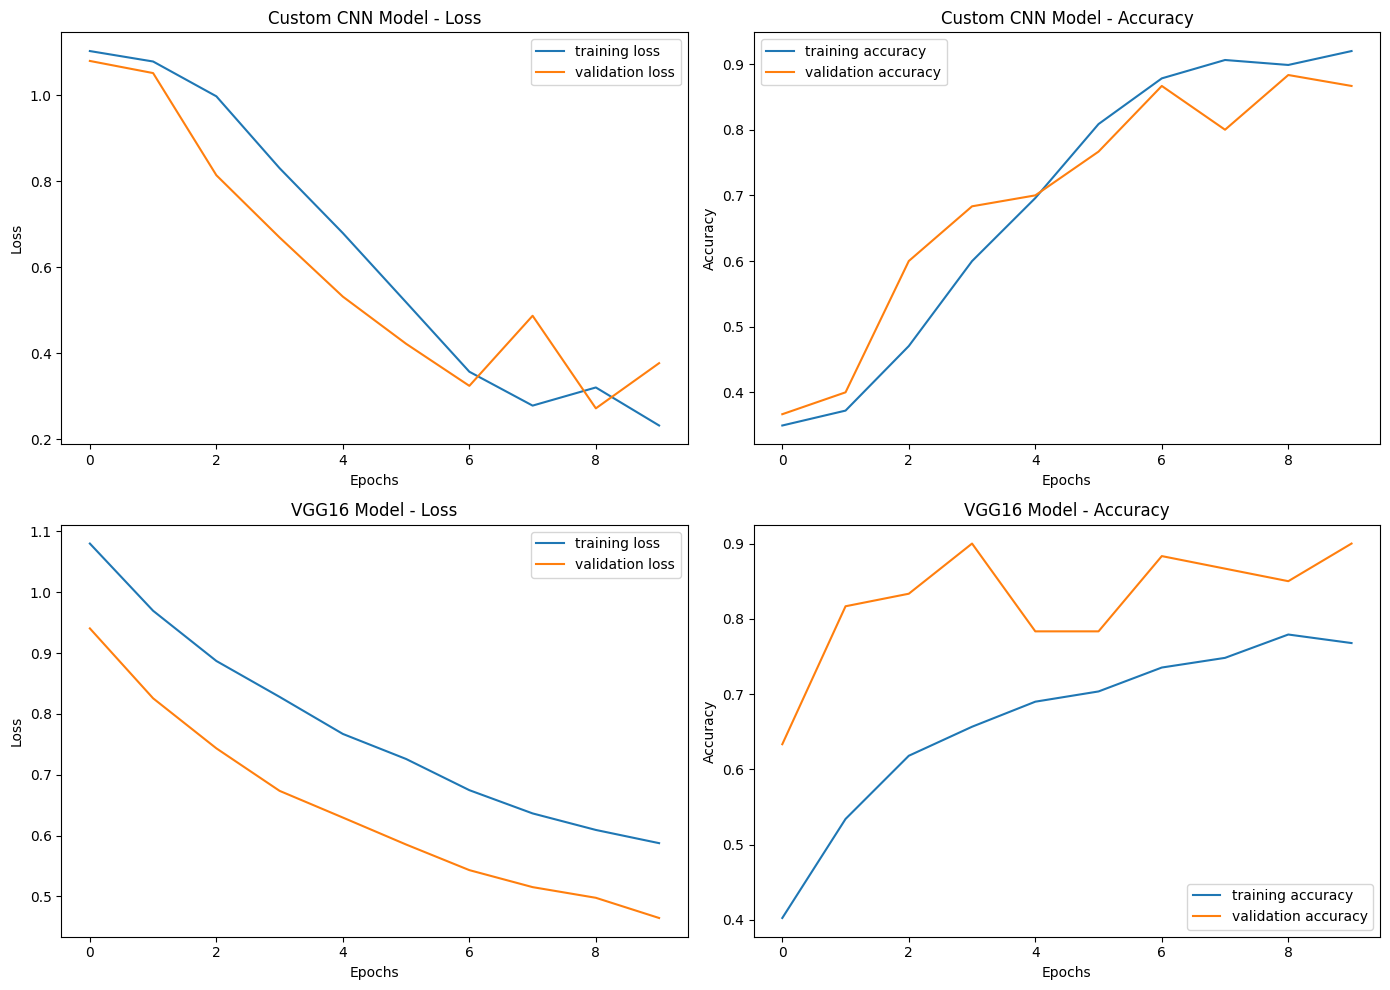

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for the original custom CNN model
sns.lineplot(ax=axes[0, 0], data=history.history['loss'], label='training loss')
sns.lineplot(ax=axes[0, 0], data=history.history['val_loss'], label='validation loss')
axes[0, 0].set_title('Custom CNN Model - Loss')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

sns.lineplot(ax=axes[0, 1], data=history.history['accuracy'], label='training accuracy')
sns.lineplot(ax=axes[0, 1], data=history.history['val_accuracy'], label='validation accuracy')
axes[0, 1].set_title('Custom CNN Model - Accuracy')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()

# Plot for the VGG16 model
sns.lineplot(ax=axes[1, 0], data=history_vgg16.history['loss'], label='training loss')
sns.lineplot(ax=axes[1, 0], data=history_vgg16.history['val_loss'], label='validation loss')
axes[1, 0].set_title('VGG16 Model - Loss')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

sns.lineplot(ax=axes[1, 1], data=history_vgg16.history['accuracy'], label='training accuracy')
sns.lineplot(ax=axes[1, 1], data=history_vgg16.history['val_accuracy'], label='validation accuracy')
axes[1, 1].set_title('VGG16 Model - Accuracy')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

### Evaluating both the Models

In [32]:
test_loss_custom, test_accuracy_custom = model.evaluate(test_generator)
test_loss_vgg16, test_accuracy_vgg16 = model_vgg16.evaluate(test_generator)

print(f"Custom CNN Model - Testing Loss: {test_loss_custom}")
print(f"Custom CNN Model - Testing Accuracy: {test_accuracy_custom}")
print(f"VGG16 Model - Testing Loss: {test_loss_vgg16}")
print(f"VGG16 Model - Testing Accuracy: {test_accuracy_vgg16}")

5/5 [==============================] - 23s 4s/step - loss: 0.5838 - accuracy: 0.8200
Custom CNN Model - Testing Loss: 0.3286112844944
Custom CNN Model - Testing Accuracy: 0.8600000143051147
VGG16 Model - Testing Loss: 0.5838464498519897
VGG16 Model - Testing Accuracy: 0.8199999928474426


## CONCLUSION
In this project, we trained two different models for plant disease detection: a custom Convolutional Neural Network (CNN) model and a VGG16 model using transfer learning.</br>
3. Custom CNN Model: Achieved an accuracy of 86% and a loss of 0.3286 on the test data.</br>
2. VGG16 Model: Achieved an accuracy of 81.99% and a loss of 0.58 on the test data.</br>
The Custom CNN model outperformed the VGG16 model, demonstrating the effectiveness of transfer learning with pre-trained models in achieving higher accuracy and lower loss.